<h1><center> A Deep Learning Approach to Predicting Human Action Using Smartphone Accelerometer Data

In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

## Data Preprocessing

In [2]:
Action = pd.read_csv('Action_Data.csv')

In [3]:
Action

,ID,Action,Timestamp,x,y,z
0,1600,A,252207666810782,-0.364761,8.793503,1.0550842;
1,1600,A,252207717164786,-0.879730,9.768784,1.0169983;
2,1600,A,252207767518790,2.001495,11.109070,2.619156;
3,1600,A,252207817872794,0.450623,12.651642,0.18455505;
4,1600,A,252207868226798,-2.164352,13.928436,-4.4224854;
...,...,...,...,...,...,...
4804398,1650,S,357734078421000,-8.234077,-4.275110,-1.4394068;
4804399,1650,S,357734098619000,-8.080796,-4.418811,-1.4154567;
4804400,1650,S,357734118715000,-7.994575,-4.457131,-1.4418018;
4804401,1650,S,357734138868000,-8.040081,-4.366121,-1.4968873;


In [4]:
Action['Timestamp'] /= 1e9
Action.head()

,ID,Action,Timestamp,x,y,z
0,1600,A,252207.666811,-0.364761,8.793503,1.0550842;
1,1600,A,252207.717165,-0.879730,9.768784,1.0169983;
2,1600,A,252207.767519,2.001495,11.109070,2.619156;
3,1600,A,252207.817873,0.450623,12.651642,0.18455505;
4,1600,A,252207.868227,-2.164352,13.928436,-4.4224854;


In [5]:
Action.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804403 entries, 0 to 4804402
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ID         int64  
 1   Action     object 
 2   Timestamp  float64
 3   x          float64
 4   y          float64
 5   z          object 
dtypes: float64(3), int64(1), object(2)
memory usage: 219.9+ MB


In [6]:
Action['z'] = Action['z'].str.replace(';', '').astype(float)
Action['z'] = pd.to_numeric(Action['z'], errors='coerce')
Action['x'] = pd.to_numeric(Action['x'], errors='coerce')
Action['y'] = pd.to_numeric(Action['y'], errors='coerce')

In [7]:
df = Action

In [8]:
df

,ID,Action,Timestamp,x,y,z
0,1600,A,252207.666811,-0.364761,8.793503,1.055084
1,1600,A,252207.717165,-0.879730,9.768784,1.016998
2,1600,A,252207.767519,2.001495,11.109070,2.619156
3,1600,A,252207.817873,0.450623,12.651642,0.184555
4,1600,A,252207.868227,-2.164352,13.928436,-4.422485
...,...,...,...,...,...,...
4804398,1650,S,357734.078421,-8.234077,-4.275110,-1.439407
4804399,1650,S,357734.098619,-8.080796,-4.418811,-1.415457
4804400,1650,S,357734.118715,-7.994575,-4.457131,-1.441802
4804401,1650,S,357734.138868,-8.040081,-4.366121,-1.496887


In [9]:
display(df['Action'].value_counts())

K    285190
A    279817
M    278766
P    272730
O    272219
H    270756
G    269609
E    269604
B    268409
R    268065
L    265781
S    265214
D    264592
I    261360
Q    260497
C    255645
J    249793
F    246356
Name: Action, dtype: int64

In [10]:
actions = Action['Action'].value_counts().index

In [11]:
actions

Index(['K', 'A', 'M', 'P', 'O', 'H', 'G', 'E', 'B', 'R', 'L', 'S', 'D', 'I',
       'Q', 'C', 'J', 'F'],
      dtype='object')

### Exploratory Data Analysis

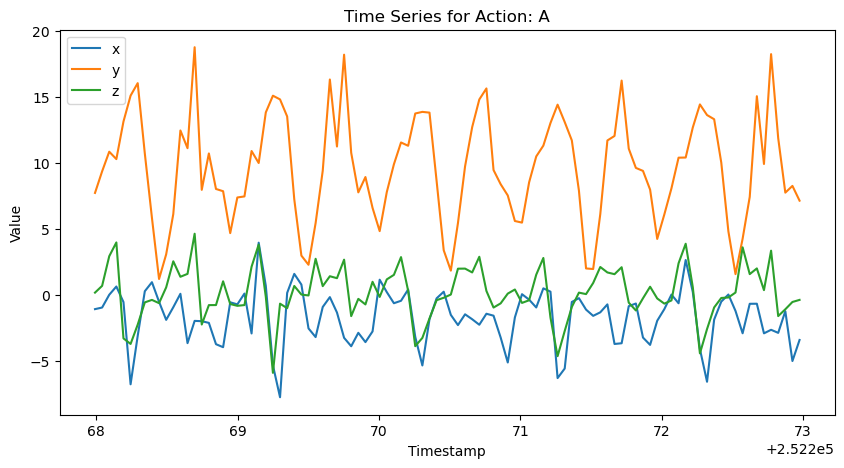

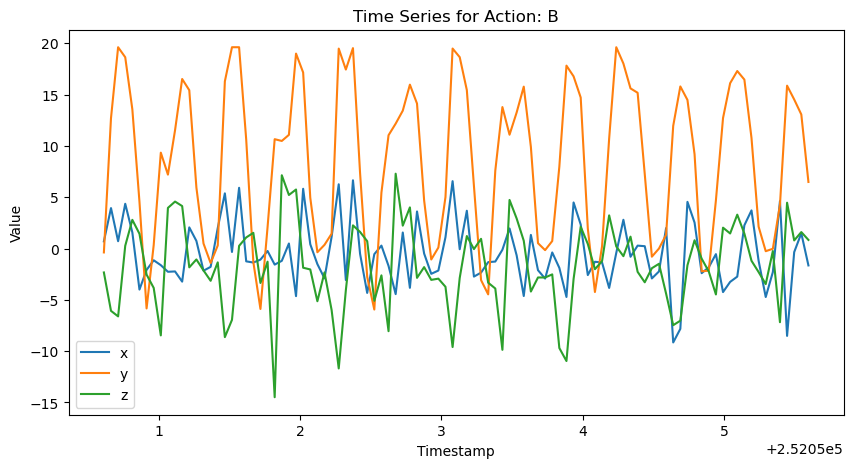

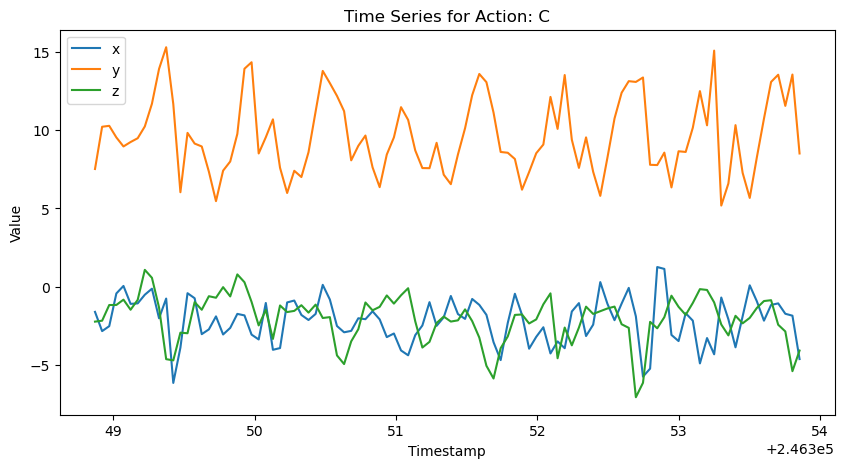

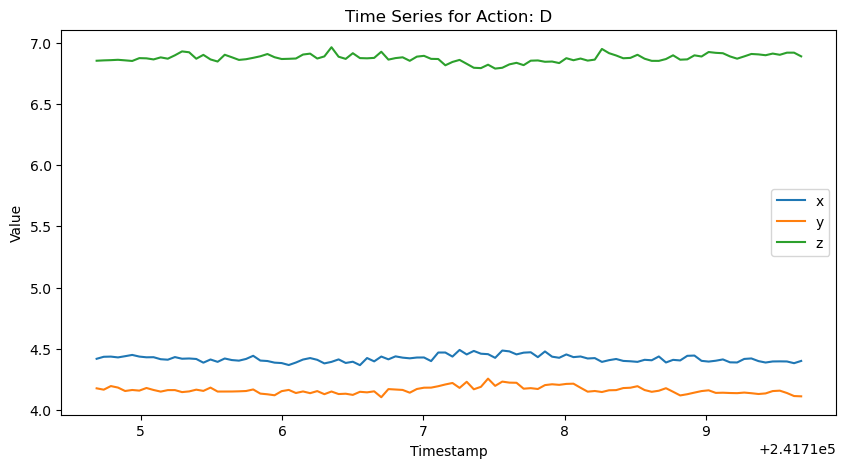

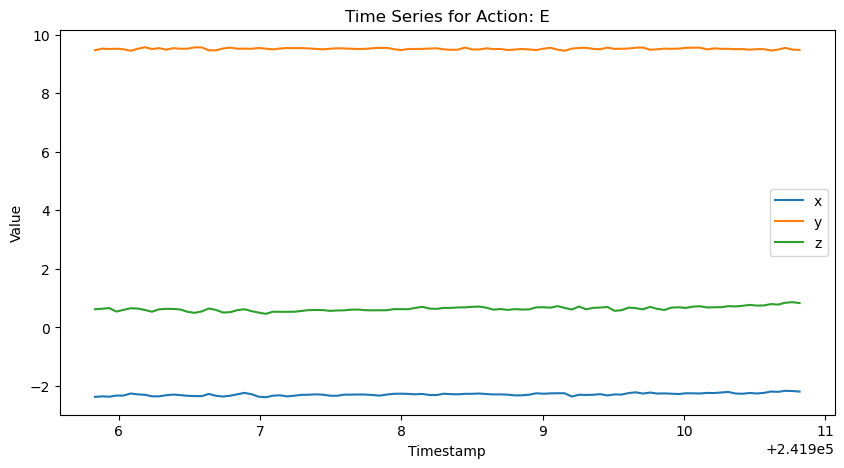

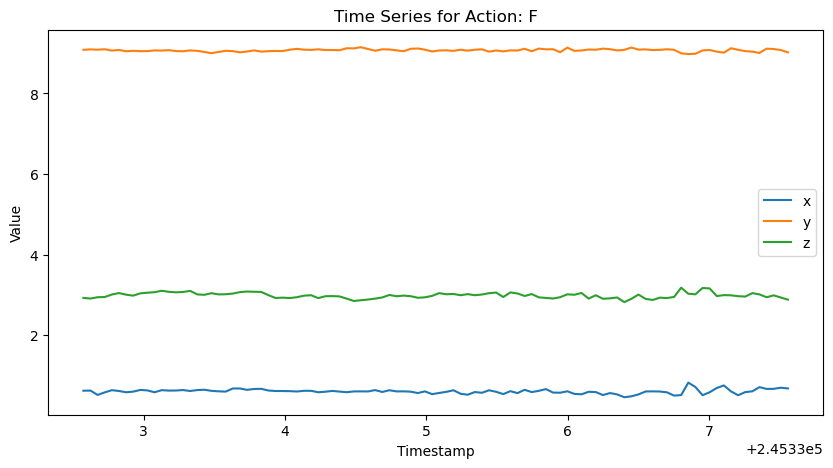

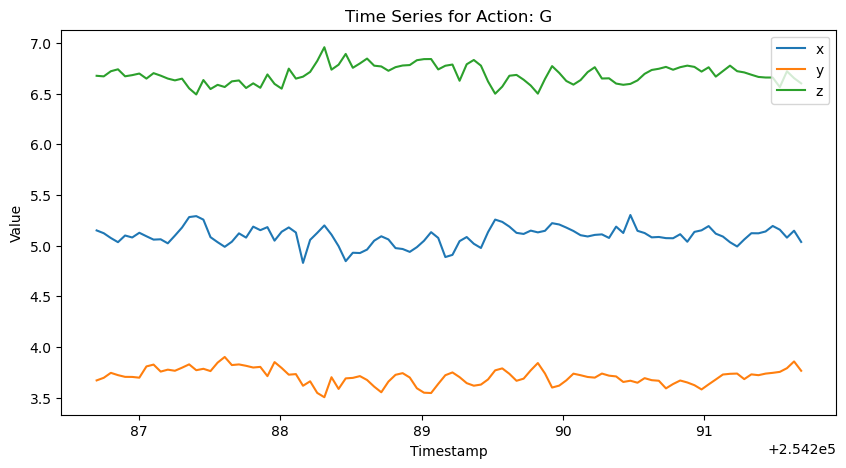

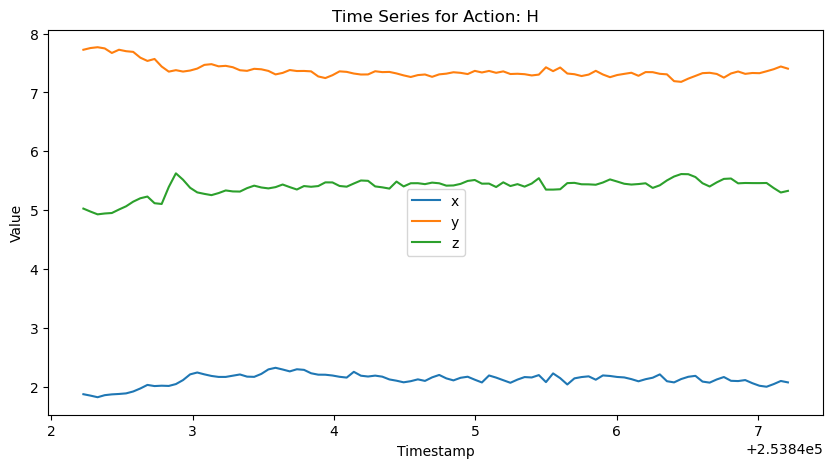

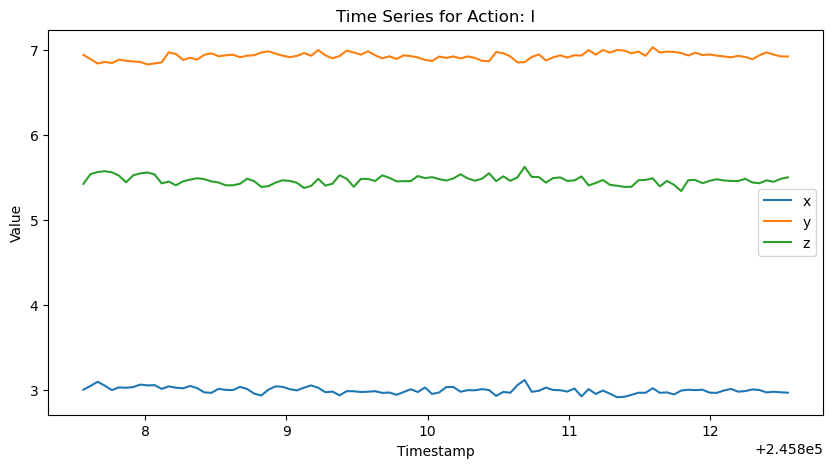

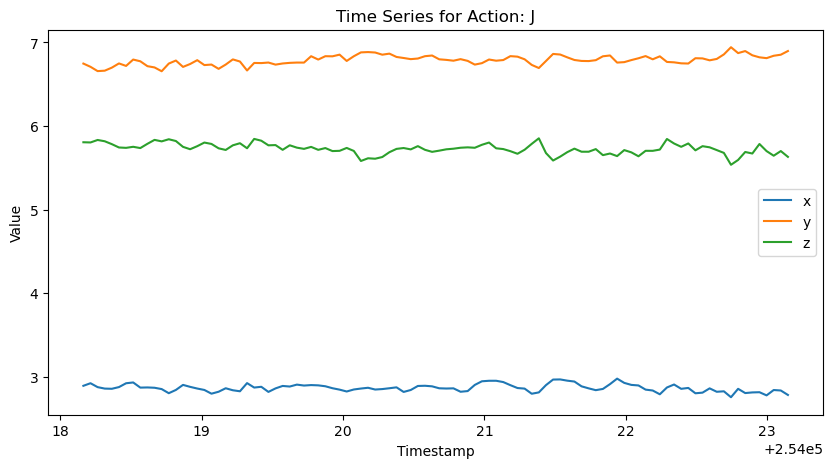

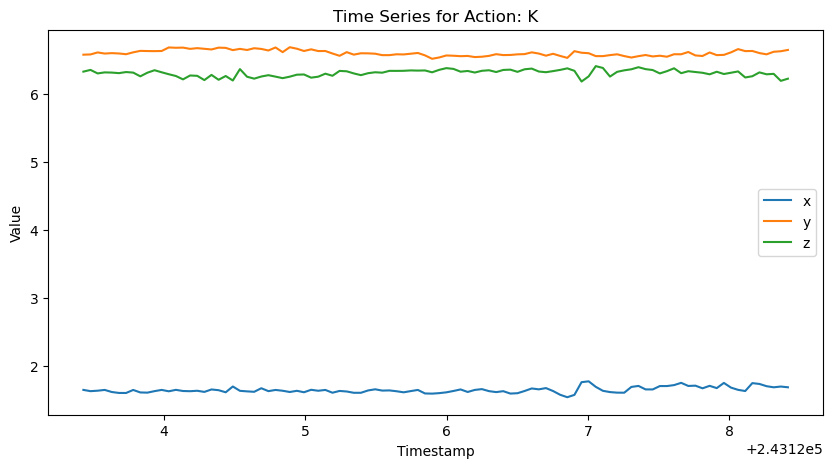

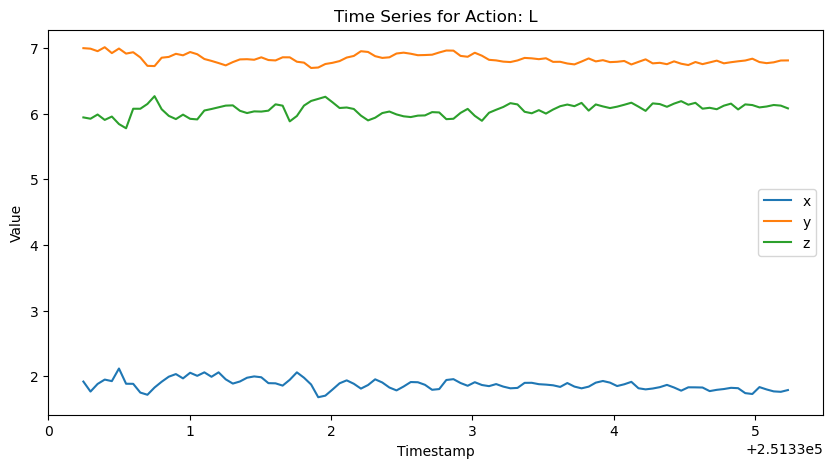

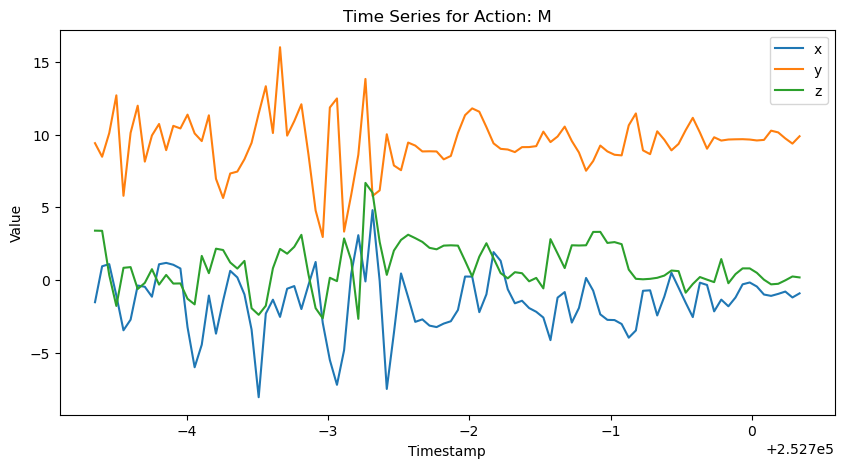

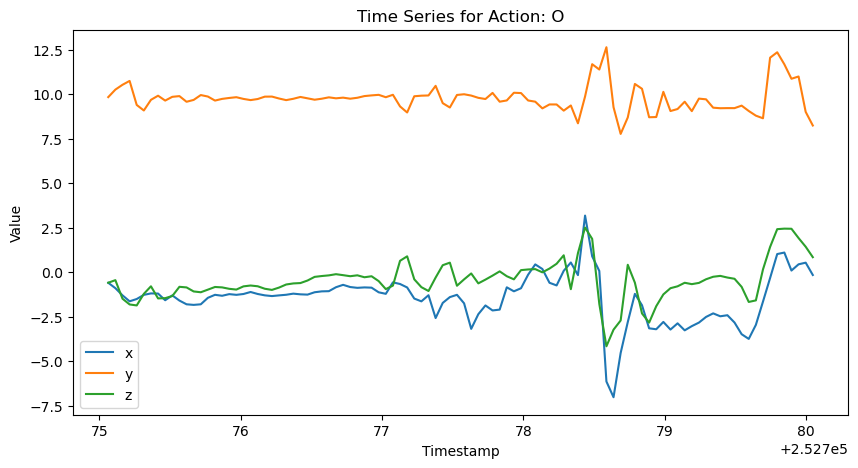

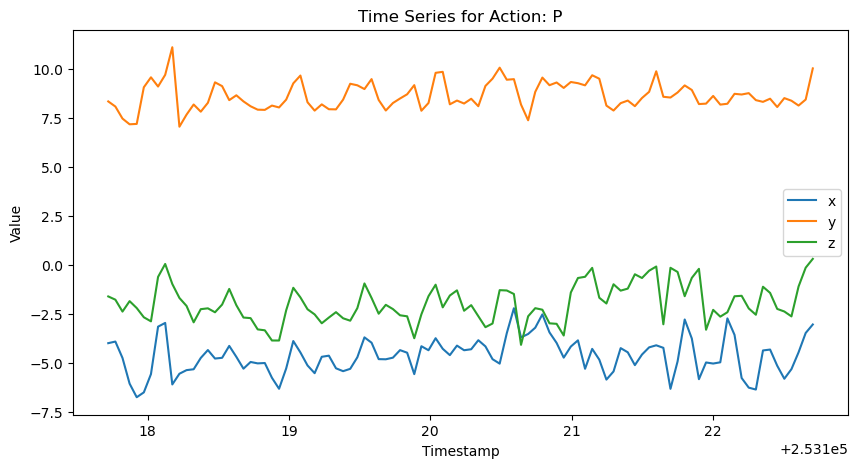

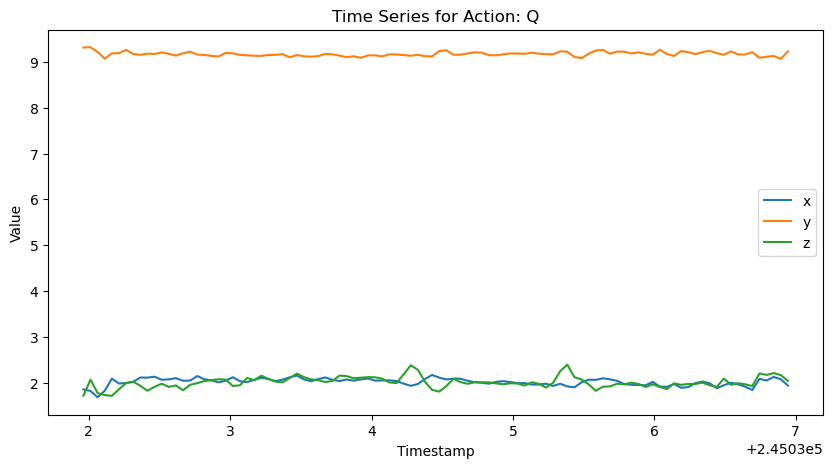

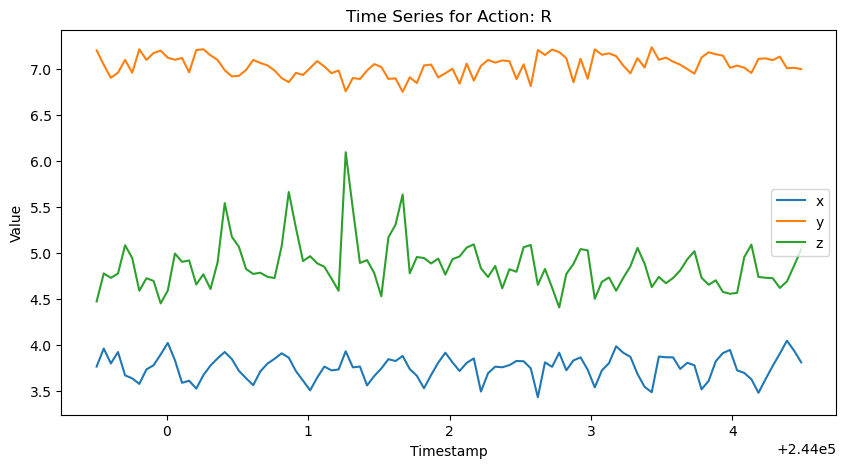

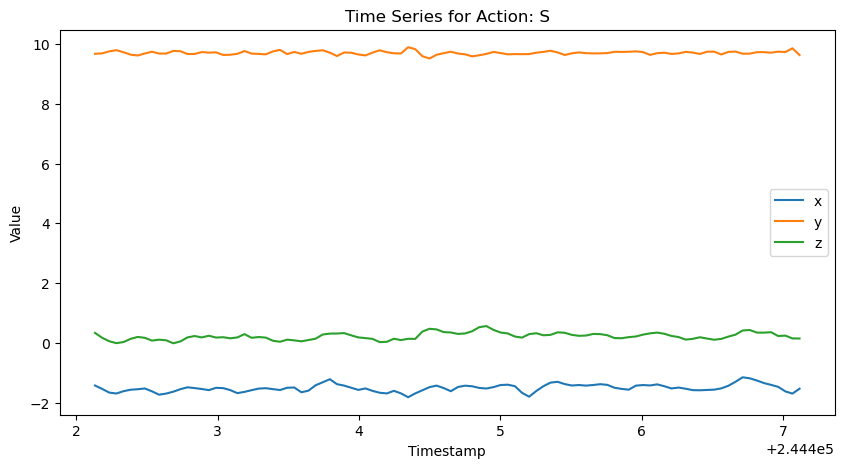

In [12]:
df_id1600 = df[df['ID'] == 1600]
df_id1600_sorted = df_id1600.sort_values(['Action', 'Timestamp'])

selected_rows = []

grouped = df_id1600_sorted.groupby('Action')

for action, group in grouped:
    first_row = group.sample(n=1)
    next_rows = group.iloc[group.index.get_loc(first_row.index[0]) + 1: group.index.get_loc(first_row.index[0]) + 100]
    selected = pd.concat([first_row, next_rows])
    selected_rows.append(selected)

df_id1600_sampled = pd.concat(selected_rows)

unique_actions = sorted(df_id1600_sampled['Action'].unique())

for action in unique_actions:
    df_action = df_id1600_sampled[df_id1600_sampled['Action'] == action]
    
    plt.figure(figsize=(10, 5))
    plt.title(f'Time Series for Action: {action}')

    plt.plot(df_action['Timestamp'], df_action['x'], label='x')
    plt.plot(df_action['Timestamp'], df_action['y'], label='y')
    plt.plot(df_action['Timestamp'], df_action['z'], label='z')

    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [13]:
min_count = df['Action'].value_counts().min()

df_downsampled = df.groupby('Action').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

In [14]:
display(df_downsampled['Action'].value_counts())

A    246356
B    246356
R    246356
Q    246356
P    246356
O    246356
M    246356
L    246356
K    246356
J    246356
I    246356
H    246356
G    246356
F    246356
E    246356
D    246356
C    246356
S    246356
Name: Action, dtype: int64

In [15]:
df_downsampled.drop(columns=['Timestamp'], inplace=True)

<h2> Splitting Data

In [16]:
ids = df_downsampled['ID'].unique()

np.random.seed(42)  
np.random.shuffle(ids)

In [17]:
np.random.shuffle(ids)

train_ids = ids[:35]
test_ids = ids[35:50]
train_df = df_downsampled[df_downsampled['ID'].isin(train_ids)]
test_df = df_downsampled[df_downsampled['ID'].isin(test_ids)]

In [18]:
train_frames = []
test_frames = []

actions = df_downsampled['Action'].unique()

for action in actions:
    action_data = df_downsampled[df_downsampled['Action'] == action]
    
    action_train_split, action_test_split = train_test_split(action_data, test_size=0.2, random_state=42)
    
    train_frames.append(action_train_split)
    test_frames.append(action_test_split)

train_df = pd.concat(train_frames)
test_df = pd.concat(test_frames)

In [19]:
X_train = train_df.drop('Action', axis=1) 
y_train = train_df['Action']              
X_test = test_df.drop('Action', axis=1)
y_test = test_df['Action']

In [23]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


num_classes = len(label_encoder.classes_)

In [95]:
y = df_downsampled['Action']

<h2> Scaling Data

In [25]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train = scaled_X_train.reshape((scaled_X_train.shape[0], scaled_X_train.shape[1], 1))
scaled_X_test = scaled_X_test.reshape((scaled_X_test.shape[0], scaled_X_test.shape[1], 1))

In [26]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

<h2> Creating and Training the Model

In [83]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(scaled_X_train.shape[1], scaled_X_train.shape[2])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),  
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [84]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.02),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
history = model.fit(scaled_X_train, y_train_encoded, epochs=100, batch_size=1024, validation_data=(scaled_X_test, y_test_encoded))

Epoch 1/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 64s 18ms/step - accuracy: 0.5161 - loss: 1.4146 - val_accuracy: 0.7132 - val_loss: 0.8113
Epoch 2/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 63s 18ms/step - accuracy: 0.7136 - loss: 0.8075 - val_accuracy: 0.7302 - val_loss: 0.7598
Epoch 3/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 62s 18ms/step - accuracy: 0.7304 - loss: 0.7562 - val_accuracy: 0.7396 - val_loss: 0.7318
Epoch 4/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 62s 18ms/step - accuracy: 0.7403 - loss: 0.7295 - val_accuracy: 0.7450 - val_loss: 0.7112
Epoch 5/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 63s 18ms/step - accuracy: 0.7450 - loss: 0.7140 - val_accuracy: 0.7467 - val_loss: 0.7054
Epoch 6/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 63s 18ms/step - accuracy: 0.7490 - loss: 0.7027 - val_accuracy: 0.7469 - val_loss: 0.7085
Epoch 7/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 63s 18ms/step - accuracy: 0.7515 - loss: 0.6942 - val_accuracy: 0.7526 - val_loss: 0.6910
Epoch 8/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 63s 18ms/step - accuracy: 

Epoch 50/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 66s 19ms/step - accuracy: 0.7731 - loss: 0.6325 - val_accuracy: 0.7712 - val_loss: 0.6415
Epoch 51/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 66s 19ms/step - accuracy: 0.7733 - loss: 0.6318 - val_accuracy: 0.7704 - val_loss: 0.6432
Epoch 52/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 66s 19ms/step - accuracy: 0.7732 - loss: 0.6325 - val_accuracy: 0.7709 - val_loss: 0.6416
Epoch 53/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 67s 19ms/step - accuracy: 0.7728 - loss: 0.6327 - val_accuracy: 0.7725 - val_loss: 0.6361
Epoch 54/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 66s 19ms/step - accuracy: 0.7739 - loss: 0.6304 - val_accuracy: 0.7691 - val_loss: 0.6449
Epoch 55/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 68s 20ms/step - accuracy: 0.7735 - loss: 0.6308 - val_accuracy: 0.7704 - val_loss: 0.6439
Epoch 56/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 72s 21ms/step - accuracy: 0.7738 - loss: 0.6304 - val_accuracy: 0.7728 - val_loss: 0.6368
Epoch 57/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 75s 22ms/step - ac

Epoch 99/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - accuracy: 0.7768 - loss: 0.6226 - val_accuracy: 0.7729 - val_loss: 0.6355
Epoch 100/100
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 78s 23ms/step - accuracy: 0.7761 - loss: 0.6238 - val_accuracy: 0.7715 - val_loss: 0.6393


<h2> Evaluating the Model

In [87]:
loss, accuracy = model.evaluate(scaled_X_test, y_test_encoded)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

27716/27716 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7391 - loss: 0.7329
Test Loss: 0.6392474174499512
Test Accuracy: 0.7715098261833191


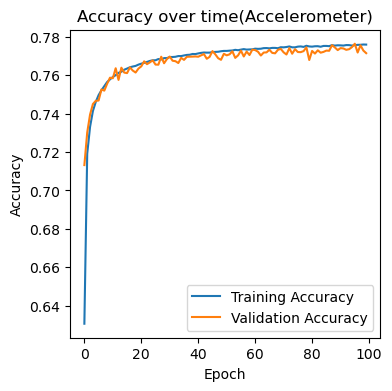

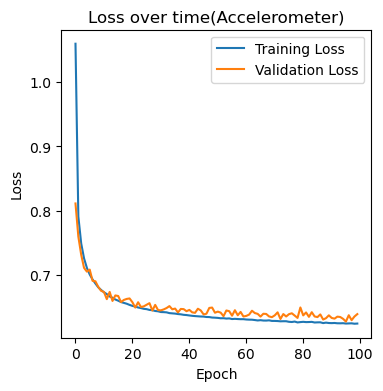

In [88]:
plt.figure(figsize=(4,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over time(Accelerometer)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over time(Accelerometer)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()

In [91]:
y_pred = model.predict(scaled_X_test)
y_pred_class = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test_encoded, y_pred_class)

27716/27716 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step


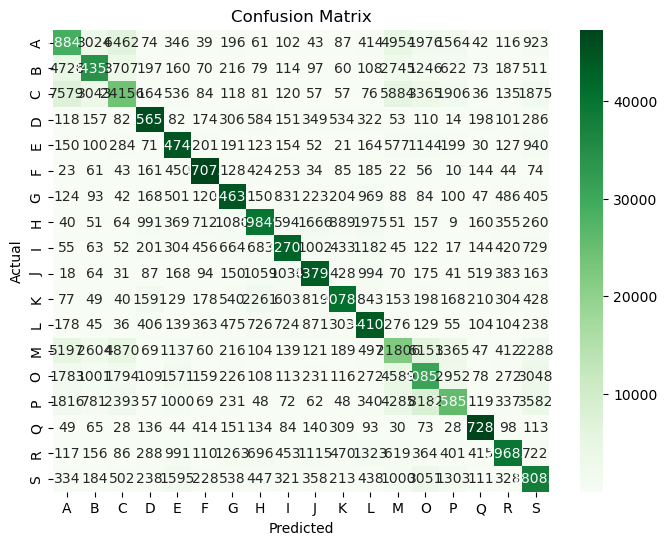

In [96]:
action_labels = np.unique(y)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=action_labels, yticklabels=action_labels, cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()